In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [10]:
sales = pd.read_csv('sales.csv')
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [11]:
sales.shape

(113036, 18)

In [12]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [13]:
sales.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [14]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [30]:
sales.tail()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260
113035,2016-03-04,4,March,2016,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",23,24,64,655,552,1207


In [28]:
sales['Customer_Gender'].value_counts()

M    58312
F    54724
Name: Customer_Gender, dtype: int64

In [52]:
x=sales[(sales.Customer_Age>20) & (sales.Customer_Gender== 'M')]
x.head()
# x.shape

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
8,2014-02-22,22,February,2014,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,22,45,120,1096,990,2086
9,2016-02-22,22,February,2016,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,21,45,120,1046,945,1991
12,2013-07-15,15,July,2013,34,Young Adults (25-34),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,7,45,120,349,315,664


In [62]:
sales['Product_Category'].value_counts()

Accessories    70120
Bikes          25982
Clothing       16934
Name: Product_Category, dtype: int64

In [63]:
sales['Sub_Category'].value_counts()

Tires and Tubes      33870
Bottles and Cages    15876
Road Bikes           13430
Helmets              12158
Mountain Bikes        8854
Jerseys               6010
Caps                  4358
Fenders               4032
Touring Bikes         3698
Gloves                2686
Cleaners              1802
Shorts                1794
Hydration Packs       1334
Socks                 1122
Vests                  964
Bike Racks             592
Bike Stands            456
Name: Sub_Category, dtype: int64

# Visulaize 

<AxesSubplot:ylabel='Density'>

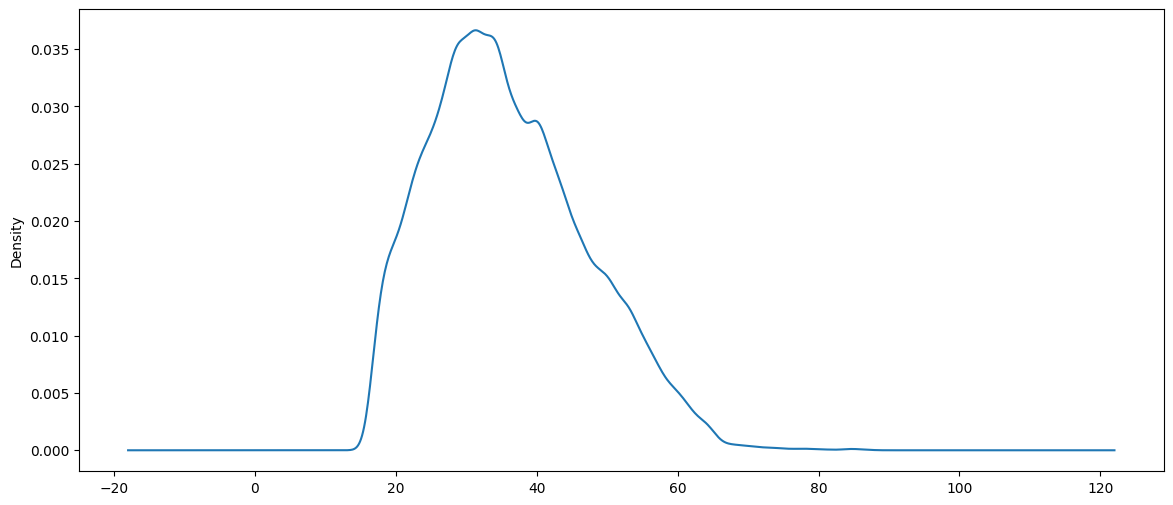

In [64]:
sales['Customer_Age'].plot(kind='kde', figsize=(14,6))

In [66]:
sales['Order_Quantity'].mean()

11.901659648253654

<AxesSubplot:ylabel='Frequency'>

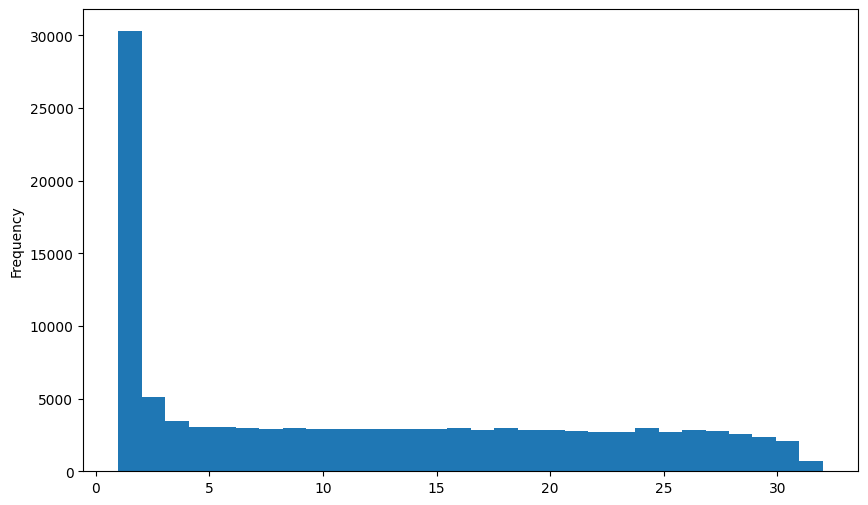

In [71]:

sales['Order_Quantity'].plot(kind='hist', bins=30, figsize=(10,6))


# sales per year

In [74]:
sales['Year'].value_counts(0)

2014    29398
2016    29398
2013    24443
2015    24443
2012     2677
2011     2677
Name: Year, dtype: int64

<AxesSubplot:>

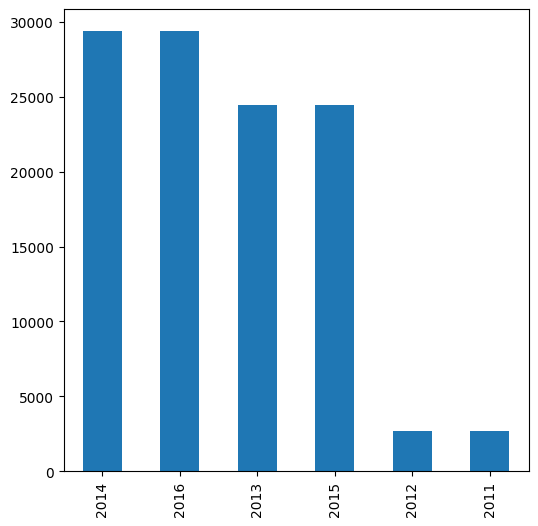

In [80]:
sales['Year'].value_counts().plot(kind='bar', figsize=(6,6))

In [76]:
sales['Month'].value_counts()

June         11234
December     11200
May          11128
April        10182
March         9674
January       9284
February      9022
October       8750
November      8734
August        8200
September     8166
July          7462
Name: Month, dtype: int64

<AxesSubplot:>

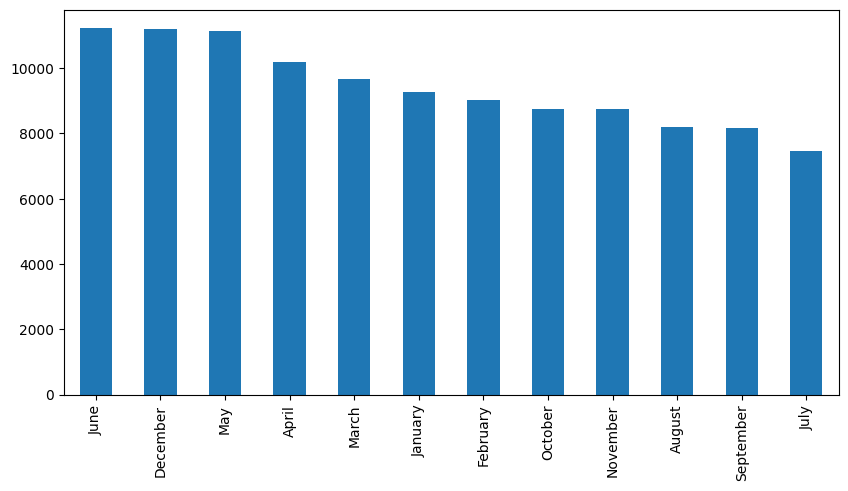

In [78]:
sales['Month'].value_counts().plot(kind='bar',figsize=(10,5))

# list of every product sold

In [82]:
sales['Product'].unique()

array(['Hitch Rack - 4-Bike', 'All-Purpose Bike Stand',
       'Mountain Bottle Cage', 'Water Bottle - 30 oz.',
       'Road Bottle Cage', 'AWC Logo Cap', 'Bike Wash - Dissolver',
       'Fender Set - Mountain', 'Half-Finger Gloves, L',
       'Half-Finger Gloves, M', 'Half-Finger Gloves, S',
       'Sport-100 Helmet, Black', 'Sport-100 Helmet, Red',
       'Sport-100 Helmet, Blue', 'Hydration Pack - 70 oz.',
       'Short-Sleeve Classic Jersey, XL',
       'Short-Sleeve Classic Jersey, L', 'Short-Sleeve Classic Jersey, M',
       'Short-Sleeve Classic Jersey, S', 'Long-Sleeve Logo Jersey, M',
       'Long-Sleeve Logo Jersey, XL', 'Long-Sleeve Logo Jersey, L',
       'Long-Sleeve Logo Jersey, S', 'Mountain-100 Silver, 38',
       'Mountain-100 Silver, 44', 'Mountain-100 Black, 48',
       'Mountain-100 Silver, 48', 'Mountain-100 Black, 38',
       'Mountain-200 Silver, 38', 'Mountain-100 Black, 44',
       'Mountain-100 Silver, 42', 'Mountain-200 Black, 46',
       'Mountain-200 Silver

<AxesSubplot:>

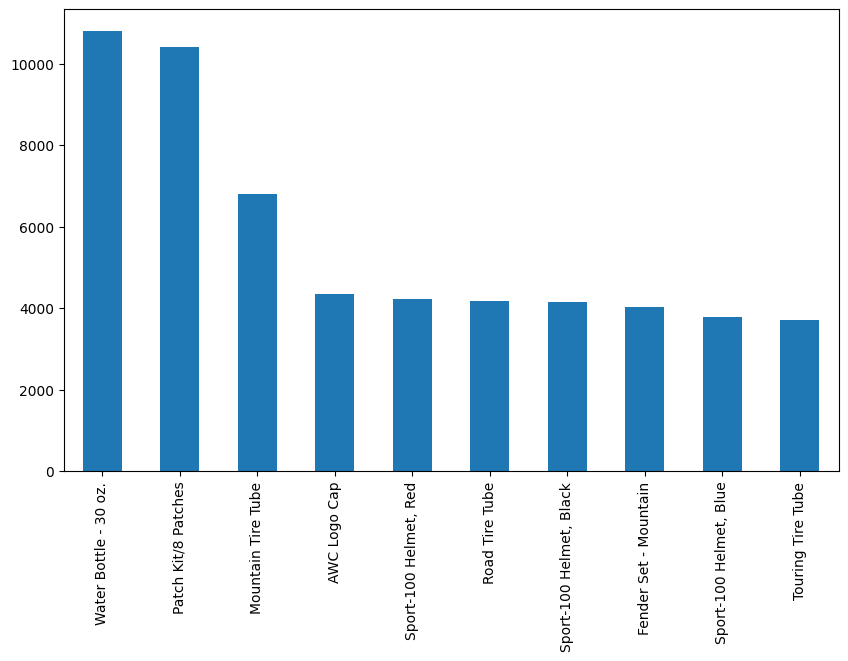

In [83]:
sales['Product'].value_counts().head(10).plot(kind='bar',figsize=(10,6))

# Scatter Plot

In [100]:
pip install seaborn

     -------------------------------------- 292.8/292.8 kB 6.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:xlabel='Order_Quantity', ylabel='Unit_Price'>

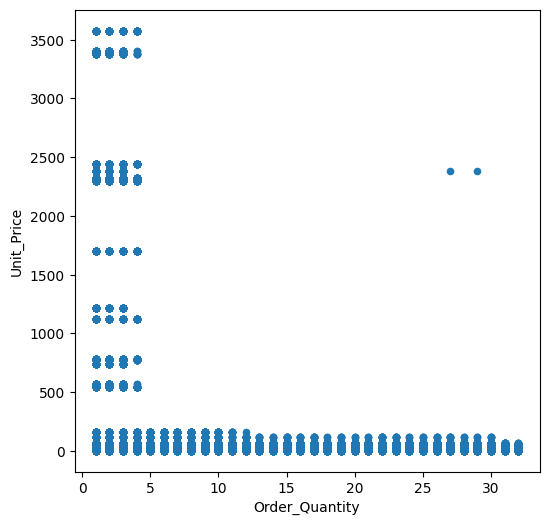

In [108]:
sales.plot(kind='scatter', x='Order_Quantity',y='Unit_Price',figsize=(6,6))

In [ ]:
sales[['Profit', 'Country']].boxplot(by='Country', figsize=(10,6))

In [ ]:
sales[['Customer_Age', 'Country']].boxplot(by='Country', figsize=(10,6))


# revenue to every sale

In [96]:
sales['Revenue']+=50

In [99]:
sales.loc[(sales['Country']=='Cannada') | (sales['Country']=='France')].shape[0]

10998

# top-5 sales with the highest revenue

In [110]:
sales.sort_values(['Revenue'], ascending=False).head(5)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58124
112072,2013-07-24,24,July,2013,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",27,1482,2384,14055,40014,54119
71129,2011-07-08,8,July,2011,22,Youth (<25),M,Canada,Alberta,Bikes,Road Bikes,"Road-150 Red, 48",4,2171,3578,5628,8684,14362
70307,2011-04-30,30,April,2011,44,Adults (35-64),M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14219
70601,2011-09-30,30,September,2011,19,Youth (<25),F,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14219


# Higest Revenue

In [95]:
Highest_Revenue= sales['Revenue']==sales['Revenue'].max();
sales.loc[Highest_Revenue]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58074


In [146]:
orders= (sales['Year']==2016 )
sales.loc[orders]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2138
5,2016-05-15,15,May,2016,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,297,225,572
7,2016-05-22,22,May,2016,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,2,45,120,100,90,240
9,2016-02-22,22,February,2016,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,21,45,120,1046,945,2041
19,2016-01-22,22,January,2016,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,1,45,120,74,45,169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113023,2016-03-20,20,March,2016,34,Young Adults (25-34),M,United States,California,Clothing,Vests,"Classic Vest, S",26,24,64,1007,624,1681
113025,2016-04-03,3,April,2016,34,Young Adults (25-34),M,United States,California,Clothing,Vests,"Classic Vest, S",14,24,64,542,336,928
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,234
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1233


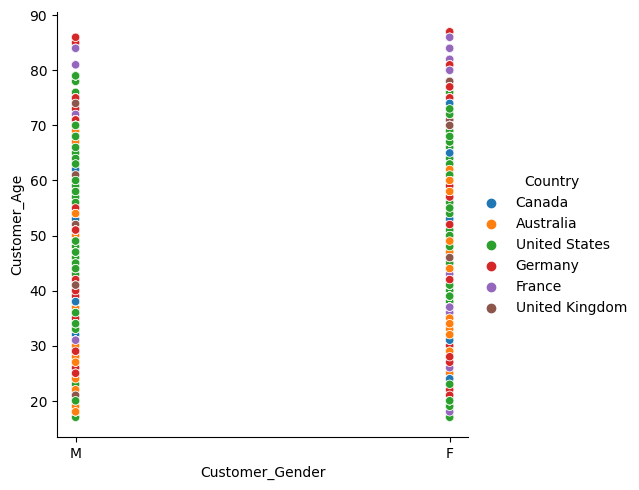

In [133]:
sns.relplot(x='Customer_Gender', y='Customer_Age', hue='Country', data=sales)

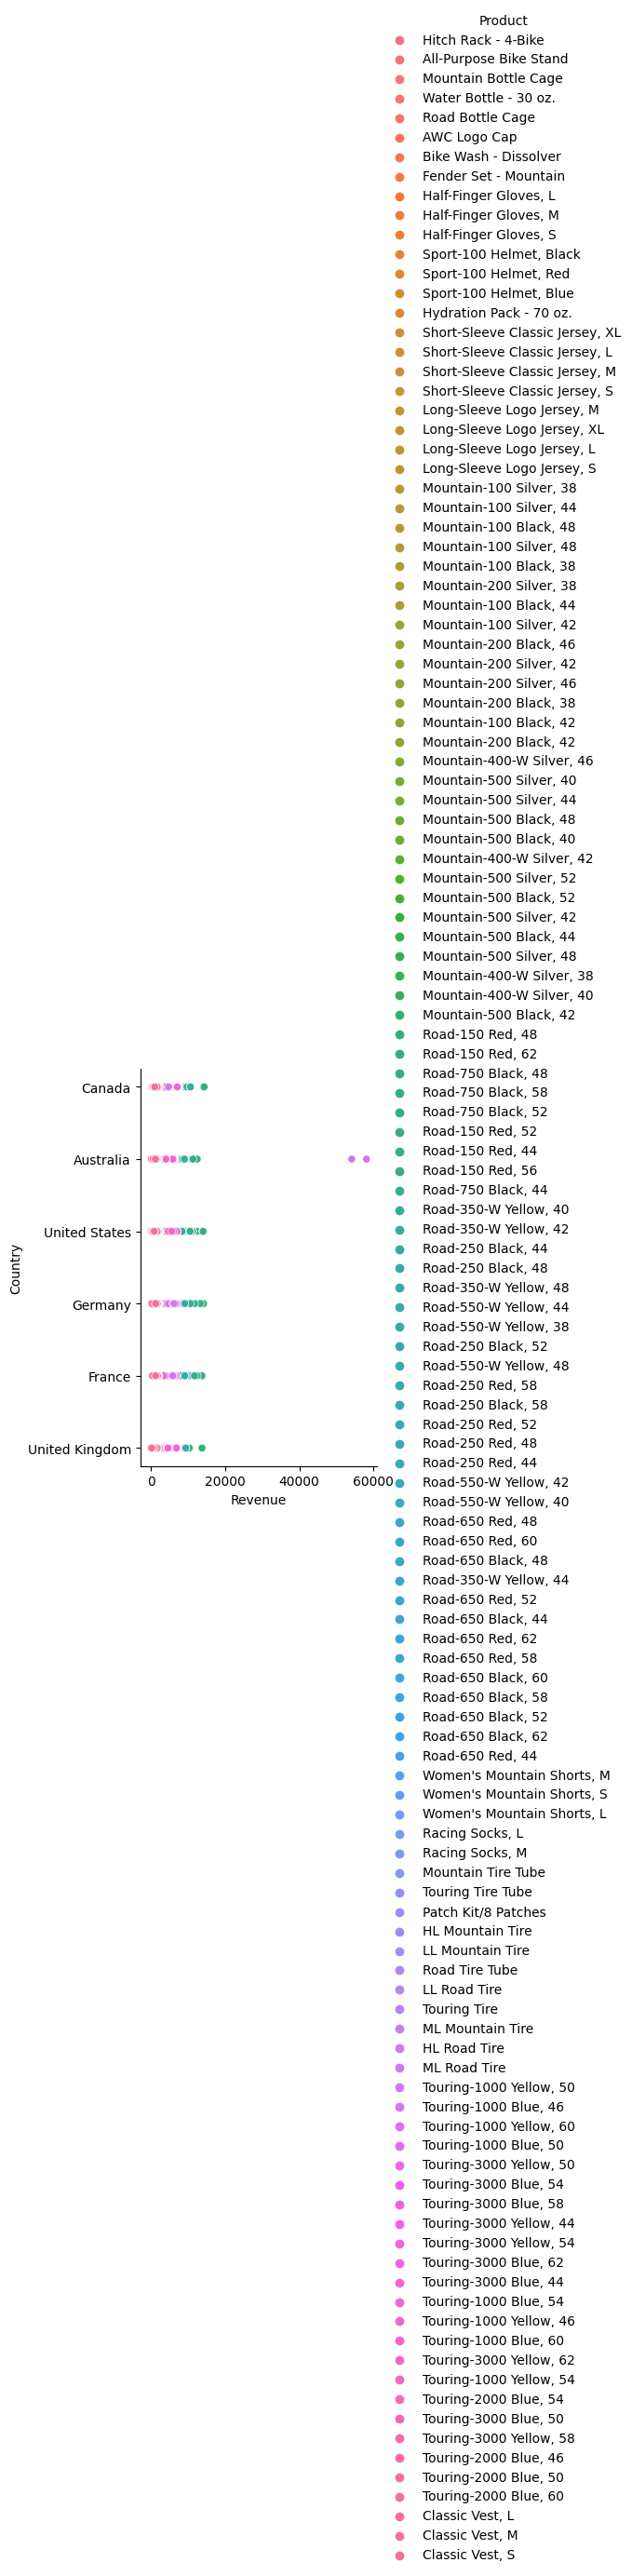

In [145]:
sns.relplot(x='Revenue', y='Country',hue='Product' ,data=sales)

In [127]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,1000
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,1000
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2451
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2138
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,468


In [153]:
pip install pyppeteer

     -------------------------------------- 83.4/83.4 kB 246.3 kB/s eta 0:00:00
     -------------------------------------- 78.5/78.5 kB 396.7 kB/s eta 0:00:00
     -------------------------------------- 140.4/140.4 kB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 98.6/98.6 kB 2.9 MB/s eta 0:00:00
     -------------------------------------- 160.2/160.2 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
